In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart_disease.csv")

In [3]:
df1=pd.read_csv("heart_disease.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df["oldpeak"].isnull().sum()

62

In [12]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [15]:
df["age"].skew()

-0.13679653817221868

In [17]:
df["trestbps"].skew()

0.3536499733817675

In [19]:
df["chol"].skew()

-0.564765692042219

In [20]:
df["oldpeak"].fillna(value=df["oldpeak"].mean(),inplace=True)

C:\Users\jabir\AppData\Local\Temp\ipykernel_3856\3855091907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oldpeak"].fillna(value=df["oldpeak"].mean(),inplace=True)


In [21]:
df["oldpeak"].isnull().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [26]:
df["cp"].unique()#types of chest pain

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [27]:
df["fbs"].unique()#fasting blood sugar level>120

array([ True, False])

In [28]:
df["restecg"].unique()#resting ecg(0,1,2)

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [33]:
df["exang"].unique()#exercised induced angina

array(['FALSE', 'TRUE', 'TURE'], dtype=object)

In [35]:
filtered_df=df["exang"][df["exang"]=="TURE"]

In [37]:
 filtered_df=df["exang"]=="TRUE"

In [39]:
df["exang"]=filtered_df

In [41]:
df1["exang"]=df["exang"]

In [43]:
df["exang"].unique()

array([False,  True])

In [45]:
df["num"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [47]:
df["thal"].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [49]:
df["trestbps"].isnull().sum()

0

In [51]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score,f1_score,precision_score

In [52]:
LE=LabelEncoder()

In [53]:
SS=StandardScaler()

In [57]:
#let's convert categorical data to numerical data

In [59]:
df['sex'] = LE.fit_transform(df['sex'])
df['cp'] = LE.fit_transform(df['cp'])
df['fbs'] = LE.fit_transform(df['fbs'])
df['restecg'] = LE.fit_transform(df['restecg'])
df['exang'] = LE.fit_transform(df['exang'])
df['slope'] = LE.fit_transform(df['slope'])
df['thal'] = LE.fit_transform(df['thal'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


our target variable is a multiclass classification

In [62]:
#let's standardize our numerical data

In [64]:
relations=df[["age","trestbps","chol","thalch","oldpeak"]]

### LET"S CHECK THE BOX PLOT AND OUTLIERS 

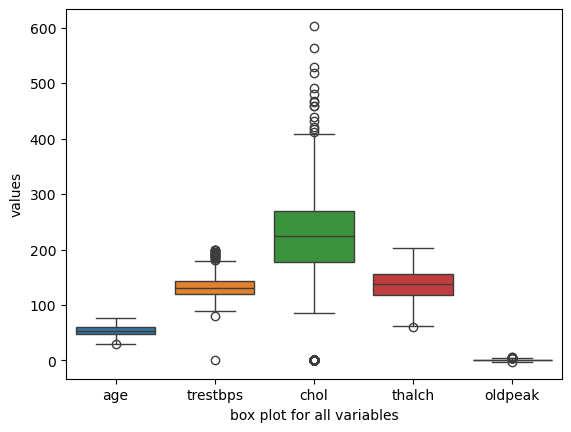

In [67]:
relations=df[["age","trestbps","chol","thalch","oldpeak"]]
sns.boxplot(relations)
plt.xlabel("box plot for all variables")
plt.ylabel("values")
plt.show()

## as we can see here that the variables modtly depict a left skewness and variables trestbps and cholestrol variable has the highest outliers which needs to be treated

In [70]:
Q1_trestbps=np.percentile(df["trestbps"],25)

In [72]:
Q3_trestbps=np.percentile(df["trestbps"],75)

In [74]:
IQR=(Q3_trestbps)-(Q1_trestbps)

In [76]:
upperwhisker=Q3_trestbps + 1.5*(IQR)

In [78]:
lowerwhisker=Q1_trestbps -1.5*(IQR)

In [80]:
# Print whisker values
print(f"Upper whisker value: {upperwhisker}")
print(f"Lower whisker value: {lowerwhisker}")


Upper whisker value: 180.0
Lower whisker value: 84.0


In [81]:
print(f"Q1 (25th percentile): {Q1_trestbps}")
print(f"Q3 (75th percentile): {Q3_trestbps}")


Q1 (25th percentile): 120.0
Q3 (75th percentile): 144.0


In [82]:
upoutlier=df["trestbps"][df["trestbps"] > upperwhisker].count()#there are 20 outliers in the upper whisker

In [83]:
lowoutlier=df["trestbps"][df["trestbps"] < lowerwhisker].count()#there are 2 outliers in the lower whisker

In [86]:
total_outliers = upoutlier + lowoutlier
total_outliers

22

In [90]:
uppercondition = df["trestbps"] > upperwhisker   # Outliers above upper whisker
lowercondition = df["trestbps"] < lowerwhisker

In [92]:
outliers_condition = uppercondition | lowercondition

In [94]:
df["trestbps"] = df["trestbps"].where(~outliers_condition, np.nan)

In [96]:
df["trestbps"].isnull().sum()

22

In [98]:
df["trestbps"].fillna(value=df["trestbps"].mean(),inplace=True)

C:\Users\jabir\AppData\Local\Temp\ipykernel_3856\1906813566.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["trestbps"].fillna(value=df["trestbps"].mean(),inplace=True)


In [100]:
Q1_chol=np.percentile(df["chol"],25)

In [102]:
Q3_chol=np.percentile(df["chol"],75)

In [104]:
IQR1=(Q3_chol)-(Q1_chol)

In [106]:
upperwhisker1=Q3_chol + 1.5*(IQR1)

In [108]:
lowerwhisker1=Q1_chol -1.5*(IQR1)

In [110]:
upoutlier1=df["chol"][df["chol"] > upperwhisker1].count()
#there are 15 outliers in the upper whisker
upoutlier1

15

In [112]:
lowoutlier1=df["chol"][df["chol"] < lowerwhisker1].count()
lowoutlier1#there are 2 outliers in the lower whisker

172

In [114]:
total_outliers1 = upoutlier1 + lowoutlier1
total_outliers1

187

In [116]:
uppercondition1 = df["chol"] > upperwhisker1   # Outliers above upper whisker
lowercondition1 = df["chol"] < lowerwhisker1

In [118]:
outliers_condition1 = uppercondition1 | lowercondition1

In [120]:
df["chol"] = df["chol"].where(~outliers_condition1, np.nan)

In [122]:
df["chol"].isnull().sum()

187

In [124]:
df["chol"].fillna(value=df["chol"].mean(),inplace=True)

C:\Users\jabir\AppData\Local\Temp\ipykernel_3856\4054289659.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["chol"].fillna(value=df["chol"].mean(),inplace=True)


In [126]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145.0,233.0,1,0,150,0,2.3,0,0,0
1,41,1,1,135.0,203.0,0,1,132,0,0.0,1,0,0
2,57,1,0,140.0,192.0,0,1,148,0,0.4,1,0,0
3,52,1,3,118.0,186.0,0,0,190,0,0.0,1,0,0
4,57,1,0,110.0,201.0,0,1,126,1,1.5,1,0,0


now after removing the outliers of numerical variables we'll see the relations amongst them 

In [129]:
correlations=df[["age","trestbps","chol","thalch","oldpeak"]].corr()

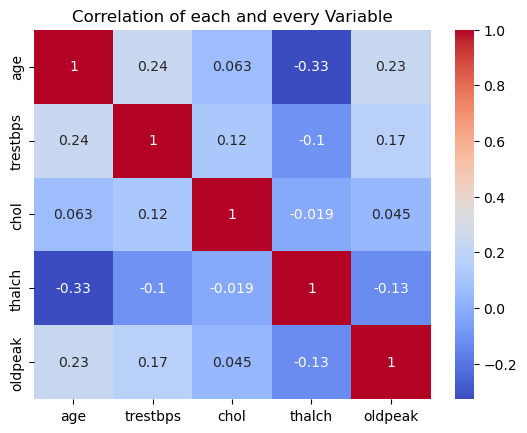

In [131]:
sns.heatmap(correlations,annot=True,cmap='coolwarm')
plt.title("Correlation of each and every Variable")
plt.show()

### here we can see that all the variaboes do not have much strong correlation between them but we can see that age and thalch have some negative correlation.
### we can also some weak negative relation between thalch and old peak
### somw weak +ve relation between oldpeak and trestbps

In [134]:
#let's plot some histogarams

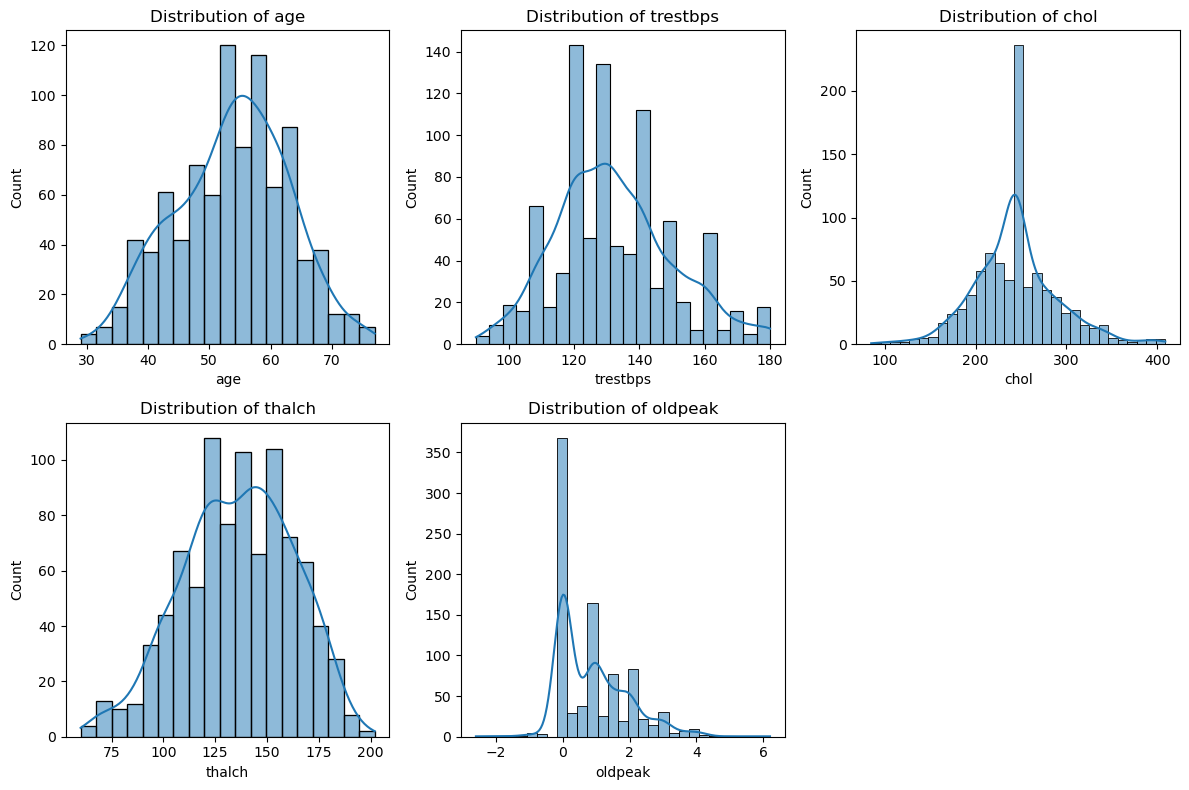

In [136]:
continuous_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


plt.figure(figsize=(12, 8))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#here we can see that chol is a normally distributed data where we can say that mean=median and is bell shaped

#whereas all the other variabes seem to have slight left skewness where most of the data is on the higher side except oldpeak where it is slightly right skewed where most of the data is the the lower side

In [140]:
##LET'S SPLIT TE DATA INTO x AND y NOW

In [142]:
x=df[df.columns[df.columns != df.columns[12]]]
x=pd.DataFrame(x)

In [144]:
x["age"]=SS.fit_transform(x[["age"]])

In [146]:
x["trestbps"]=SS.fit_transform(x[["trestbps"]])

In [148]:
x["chol"]=SS.fit_transform(x[["chol"]])

In [150]:
x["thalch"]=SS.fit_transform(x[["thalch"]])

In [152]:
x["oldpeak"]=SS.fit_transform(x[["oldpeak"]])

In [154]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006027,1,3,0.710168,-2.339999e-01,1,0,0.524183,0,1.334996e+00,0,0
1,-1.397560,1,1,0.149226,-8.831494e-01,0,1,-0.147705,0,-8.445938e-01,1,0
2,0.350503,1,0,0.429697,-1.121171e+00,0,1,0.449529,0,-4.655347e-01,1,0
3,-0.195767,1,3,-0.804376,-1.251001e+00,0,0,2.017268,0,-8.445938e-01,1,0
4,0.350503,1,0,-1.253130,-9.264260e-01,0,1,-0.371668,1,5.768777e-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,1,0,-0.411717,6.149979e-16,0,1,-0.595631,0,5.768777e-01,2,1
904,0.896773,1,0,1.888147,-1.597214e+00,0,2,-0.595631,1,1.998349e+00,1,0
905,0.241249,1,2,2.112524,6.149979e-16,0,0,-0.483649,1,1.524525e+00,0,0
906,0.241249,1,2,0.654074,-7.749578e-01,1,2,-1.155538,0,-1.052100e-16,0,2


In [156]:
Y=df["num"]

### WE WILL START OUR FIRST MODEL WITH TRAIN TEST SPLIT AND DATA VALIDATION

In [159]:
from sklearn.model_selection import train_test_split

In [161]:
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score,f1_score,precision_score

In [163]:
avgtrain_accuracy=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy=[]#creating an empty list to collectr all test accuracy 
#scores so that we get the avg of all 100 iterations
avgtrainerror=[]
avgtesterror=[]

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
DT=DecisionTreeClassifier(criterion="gini",max_depth=9)

In [169]:
for i in range(1,101):#for 100 iterations
    X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.20,random_state=i)
    #random_state is given as i
    DT.fit(X_train,Y_train)
    ytrain_pred=DT.predict(X_train)
    ytest_pred=DT.predict(X_test)
    avgtrain_accuracy.append(accuracy_score(ytrain_pred,Y_train))
#adding to empty list
    avgtest_accuracy.append(accuracy_score(ytest_pred,Y_test))
#adding to empty list
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy).round(3))

Average Train accuracy score is:  0.843
Average Test accuracy score is:  0.485


## a terrible test accuracy and an underfitted model ,maybe due to the no.of max-depth,we'll try increasing the max depth value

In [172]:
DT=DecisionTreeClassifier(criterion="gini",max_depth=20)

In [174]:
avgtrain_accuracy1=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy1=[]

In [176]:
for i in range(1,101):#for 100 iterations
    X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.20,random_state=i)
    #random_state is given as i
    DT.fit(X_train,Y_train)
    ytrain_pred=DT.predict(X_train)
    ytest_pred=DT.predict(X_test)
    avgtrain_accuracy1.append(accuracy_score(ytrain_pred,Y_train))
#adding to empty list
    avgtest_accuracy1.append(accuracy_score(ytest_pred,Y_test))
#adding to empty list
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy1).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy1).round(3))

Average Train accuracy score is:  1.0
Average Test accuracy score is:  0.457


still the worst test accuracy

In [179]:
DT=DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_split=10,min_samples_leaf=10)

In [181]:
avgtrain_accuracy2=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy2=[]

In [183]:
for i in range(1,1001):#for 100 iterations
    X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.20,random_state=i)
    #random_state is given as i
    DT.fit(X_train,Y_train)
    ytrain_pred=DT.predict(X_train)
    ytest_pred=DT.predict(X_test)
    avgtrain_accuracy2.append(accuracy_score(ytrain_pred,Y_train))
#adding to empty list
    avgtest_accuracy2.append(accuracy_score(ytest_pred,Y_test))
#adding to empty list
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy2).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy2).round(3))

Average Train accuracy score is:  0.656
Average Test accuracy score is:  0.504


In [184]:
#this gives us the better train and test accuracy,still not the best but  we'll get there
#we'll try and increase the min samples leaf and split parameter and check as it regularizes better

In [185]:
DT=DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_split=20,min_samples_leaf=20)

In [186]:
avgtrain_accuracy3=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy3=[]

In [187]:
for i in range(1,1001):#for 100 iterations
    X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.20,random_state=i)
    #random_state is given as i
    DT.fit(X_train,Y_train)
    ytrain_pred=DT.predict(X_train)
    ytest_pred=DT.predict(X_test)
    avgtrain_accuracy3.append(accuracy_score(ytrain_pred,Y_train))
#adding to empty list
    avgtest_accuracy3.append(accuracy_score(ytest_pred,Y_test))
#adding to empty list
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy3).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy3).round(3))

Average Train accuracy score is:  0.606
Average Test accuracy score is:  0.525


## i'll tune the hyperparameters using grid search cv and see and find the best parameters

In [193]:
from sklearn.model_selection import GridSearchCV


In [194]:
param_grid = {
    'max_depth': [5, 10, 15], 
    'min_samples_split': [2, 10, 20], 
    'min_samples_leaf': [1, 5, 10], 
    'ccp_alpha': [0.0, 0.01, 0.1]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'ccp_alpha': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [195]:
#we got the best paramters ,let's see if it increases the accuracy

In [200]:
DT=DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1)

In [202]:
avgtrain_accuracy4=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy4=[]

In [204]:
for i in range(1,1001):#for 100 iterations
    X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.20,random_state=i)
    #random_state is given as i
    DT.fit(X_train,Y_train)
    ytrain_pred=DT.predict(X_train)
    ytest_pred=DT.predict(X_test)
    avgtrain_accuracy4.append(accuracy_score(ytrain_pred,Y_train))
#adding to empty list
    avgtest_accuracy4.append(accuracy_score(ytest_pred,Y_test))
#adding to empty list
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy4).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy4).round(3))

Average Train accuracy score is:  0.639
Average Test accuracy score is:  0.522


Our accuracies didnt get any better we'll try and use the ensemble methods to increase our accuracy

In [207]:
from sklearn.ensemble import BaggingClassifier

In [209]:
bagdt = BaggingClassifier(DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1),
                          n_estimators=200, max_features=0.8, max_samples=0.7)


In [211]:
avgtrain_accuracy5=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy5=[]

In [213]:
for i in range(1,101):#for 100 iterations
    X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.20,random_state=i)
    #random_state is given as i
    bagdt.fit(X_train,Y_train)
    ytrain_pred=bagdt.predict(X_train)
    ytest_pred=bagdt.predict(X_test)
    avgtrain_accuracy5.append(accuracy_score(ytrain_pred,Y_train))
#adding to empty list
    avgtest_accuracy5.append(accuracy_score(ytest_pred,Y_test))
#adding to empty list
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy5).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy5).round(3))

Average Train accuracy score is:  0.971
Average Test accuracy score is:  0.569


In [215]:
bagdt=BaggingClassifier(DecisionTreeClassifier(criterion="gini",max_depth=10,min_samples_split=5,min_samples_leaf=5),n_estimators=200,max_features=0.8,max_samples=0.7)

In [217]:
avgtrain_accuracy8=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy8=[]

In [219]:
for i in range(1,101):#for 100 iterations
    X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.20,random_state=i)
    #random_state is given as i
    bagdt.fit(X_train,Y_train)
    ytrain_pred=bagdt.predict(X_train)
    ytest_pred=bagdt.predict(X_test)
    avgtrain_accuracy8.append(accuracy_score(ytrain_pred,Y_train))
#adding to empty list
    avgtest_accuracy8.append(accuracy_score(ytest_pred,Y_test))
#adding to empty list
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy8).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy8).round(3))

Average Train accuracy score is:  0.749
Average Test accuracy score is:  0.569


In [239]:
bagdt1=BaggingClassifier(DecisionTreeClassifier(criterion="gini",max_depth=15,min_samples_split=4,min_samples_leaf=6),n_estimators=200,max_features=0.8,max_samples=0.7)

In [241]:
avgtrain_accuracy9=[]#creating an empty list to collectr all the train  
#accuracy scores so that we get the avg of all 100 iterations
avgtest_accuracy9=[]

In [243]:
for i in range(1,101):#for 100 iterations
    X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.20,random_state=i)
    #random_state is given as i
    bagdt1.fit(X_train,Y_train)
    ytrain_pred=bagdt1.predict(X_train)
    ytest_pred=bagdt1.predict(X_test)
    avgtrain_accuracy9.append(accuracy_score(ytrain_pred,Y_train))
#adding to empty list
    avgtest_accuracy9.append(accuracy_score(ytest_pred,Y_test))
#adding to empty list
print("Average Train accuracy score is: ",np.mean(avgtrain_accuracy9).round(3))
print("Average Test accuracy score is: ",np.mean(avgtest_accuracy9).round(3))

Average Train accuracy score is:  0.719
Average Test accuracy score is:  0.57


#With all the models and hyperparameters tried and tested ablove this model with below paramters performed better with less variation between train and test accuracy ,this can get better as this accuracy is not that good but,i'll leave it here.
#bagdt1=BaggingClassifier(DecisionTreeClassifier(criterion="gini",max_depth=15,min_samples_split=4,min_samples_leaf=6),n_estimators=200,max_features=0.8,max_samples=0.7)

In [252]:
print("recall score:", recall_score(Y_test, ytest_pred, average="macro").round(3))
print("precision score:", precision_score(Y_test, ytest_pred, average="macro").round(3))
print("f1 score:", f1_score(Y_test, ytest_pred, average="macro").round(3))


recall score: 0.331
precision score: 0.409
f1 score: 0.322


C:\Users\jabir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [256]:
from sklearn.metrics import roc_curve,roc_auc_score

In [260]:
yprob=bagdt1.predict_proba(X_test)[:,1:]


In [262]:
fpr,tpr,dummy=roc_curve(Y_test,yprob)
#dummy is a parameter without which the roc fn wont work

ValueError: multiclass format is not supported

In [266]:
##roc does not support multiple classification it only supports binary classification

### INTERVIEW QUESTIONS

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Some common hyperparameters for decision tree models are max-depth which limits the depth of the tree ,max features which chooses the no of features and criterion which asks us to choose from the option of gin ior entropy,gini gives much smaller numbers and entropy is a little bit more computationally expensive,even though they both are pretty similar

## 2. What is the difference between the Label encoding and One-hot encoding?

one hot encoding encodes all the categorical data dimensionally whereas in label encoding the data gets encoded based on the alphabetical order of it's unique features.one hot encoding creates dimensions and lbel encoding gives labels and has ordinal relationship eg,red=2,gree=1 and blue=0 where red>green which doesn't make sense ,such relationship is not introduced in one hot encoding it  creates separate columns for red green and blue and marks as 1 wheerever it is there in the original data.